# Emotion Classification Notebook

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:

# Load data
df = pd.read_csv("emotions.csv")
print(df.head())


                                                text emotion
0  That really pissed me off. This is completely ...   anger
1  I'm scared of what will happen. I'm terrified ...    fear
2                   This situation makes me nervous.    fear
3  This is completely unacceptable. This is compl...   anger
4  I adore everything about you. I love you so much.    love


In [59]:

# Split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['emotion'], test_size=0.2)


In [60]:

# Vectorize
tfidf = TfidfVectorizer()
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [61]:

# Train model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [62]:

# Predict
y_pred = clf.predict(X_test_vec)


In [63]:

# Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       anger       1.00      1.00      1.00        23
        fear       1.00      1.00      1.00        21
         joy       1.00      1.00      1.00        21
        love       1.00      1.00      1.00        17
     sadness       1.00      1.00      1.00        28
    surprise       1.00      1.00      1.00        10

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



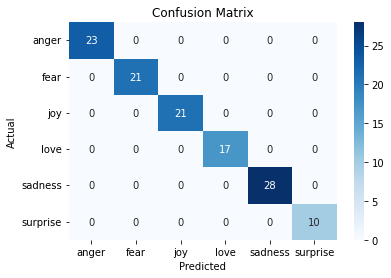

In [64]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [73]:

# Try custom input
def predict_emotion(text):
    vec = tfidf.transform([text])
    return clf.predict(vec)[0]

print(predict_emotion("I can go to Mars!"))
print(predict_emotion("I'm scared of the dark."))
print(predict_emotion("Piss off."))
print(predict_emotion("You love me."))
print(predict_emotion("Can I cry?"))
print(predict_emotion("Everyone is smiling"))

surprise
fear
anger
love
sadness
joy
